In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
import os
base_dir = "/media/gegen07/Expansion/data/mestrado/checkins_data/checkins_local"
file = os.path.join(base_dir, "/Users/vitor/Desktop/mestrado/ingred/data/checkins/Florida.csv")
data = pd.read_csv("/Users/vitor/Desktop/mestrado/ingred/data/output/florida_test/embeddings.csv")

In [3]:
data.placeid.nunique()

65067

In [22]:
pd.read_csv("/Users/vitor/Desktop/mestrado/ingred/data/output/florida_new/florida_new-embeddings.csv").head(200)

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,category,placeid
0,26.891144,23.399624,14.183931,18.216562,-25.332026,-8.032208,-35.189516,-86.227892,41.665609,-7.691602,...,0.013751,2.583901,2.743433,3.875601,0.000000,19.862181,4.147935,0.000000,Travel,758476
1,2.018291,0.099658,-0.934865,1.778219,0.102803,-1.238827,-1.695285,-3.308440,0.651813,-1.461499,...,-0.002344,0.676511,0.531182,0.000000,0.214485,0.000000,0.000000,0.034381,Travel,1110153
2,1.186296,3.016224,2.038542,-1.417059,-3.750555,-2.957405,-1.145510,-2.679238,2.373104,2.543249,...,-0.003213,0.080090,0.054338,0.000000,0.000000,0.026235,0.000000,0.000847,Nightlife,116388
3,0.918769,-8.260804,0.415541,15.906477,3.927301,-5.381117,-16.162659,-17.975725,6.096391,3.404973,...,0.000356,1.539652,0.000000,0.803493,0.834515,0.734639,0.736096,0.912566,Entertainment,15365
4,-0.689333,-2.351275,0.818022,4.781287,2.411187,-3.365819,-3.609779,-3.870851,2.758141,-0.462121,...,0.001312,0.130268,0.000000,0.296882,0.008701,0.437074,0.022339,0.233551,Shopping,1132142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.002963,-3.471487,7.251132,4.742118,1.117002,-3.680672,-13.469053,-11.624502,8.411103,6.876871,...,0.001668,0.000000,0.000000,0.750596,4.762661,0.000000,0.515313,0.000000,Entertainment,28449
196,9.523638,-3.034089,10.351960,7.847016,3.356788,-5.498647,-23.142376,-20.259576,12.847590,11.665163,...,0.003563,0.000000,0.450665,2.316075,1.859833,2.124304,0.380102,0.440071,Outdoors,621746
197,5.951833,-2.925097,12.438365,6.303679,-5.033869,-5.602720,-18.848483,-16.786471,12.693477,14.120298,...,0.004217,0.000000,0.032343,1.780070,0.981149,0.498815,1.195277,0.835716,Outdoors,383666
198,15.180220,-8.283989,15.759676,12.845514,7.598631,-3.564073,-27.315245,-26.901712,18.167207,13.471435,...,0.005295,0.000000,0.000000,2.662590,5.259805,1.694331,1.613165,0.000000,Travel,28446


In [5]:
features = pd.read_csv("/Users/vitor/Desktop/mestrado/ingred/data/output/florida_test/embeddings.csv")

In [6]:
features

,placeid,category,0,1,2,3,4,5,6,7,...,54,55,56,57,58,59,60,61,62,63
0,1246997,Shopping,-1.539844,0.063253,-1.699171,1.178515,-1.068322,0.012220,-1.105922,1.154169,...,-0.726693,0.418579,-1.246873,1.321945,-0.560979,-0.308289,0.349694,-0.404110,-0.806151,-1.180171
1,9345,Shopping,-1.343873,-0.534882,-1.253977,0.220563,-0.681315,-0.994343,-0.153223,0.092290,...,-0.355083,-0.226773,-0.628259,1.128305,1.154161,0.506113,-0.187978,0.607768,-0.580442,0.462453
2,9454,Shopping,-1.492358,0.169051,-1.558834,1.151418,-0.908227,0.300510,-1.279060,1.297996,...,-0.602353,0.544108,-1.366016,1.186741,-0.848824,-0.571860,0.332603,-0.513423,-0.878707,-1.539309
3,9500,Food,-1.492358,0.169051,-1.558834,1.151418,-0.908227,0.300510,-1.279060,1.297996,...,-0.602353,0.544108,-1.366016,1.186741,-0.848824,-0.571860,0.332603,-0.513423,-0.878707,-1.539309
4,9520,Nightlife,-1.927260,0.349838,-1.386365,-0.457480,-1.229464,-0.513243,-1.446898,0.769026,...,0.585620,-0.365741,-1.272490,1.744193,0.653532,0.338009,-0.746985,-0.769173,-0.033482,-0.664737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65062,7577880,Community,-1.705553,0.610923,-1.782316,0.420604,-1.416884,-0.080054,-1.697647,1.129009,...,0.071308,0.133023,-1.183711,1.553222,-0.301634,0.008854,-0.308796,-1.241023,-0.123210,-1.071589
65063,7578494,Shopping,-1.528455,0.134240,-1.566565,1.110476,-0.893918,0.254375,-1.263364,1.271287,...,-0.580767,0.521924,-1.377387,1.202896,-0.762075,-0.550085,0.297179,-0.456643,-0.901415,-1.492700
65064,7578833,Shopping,-1.617905,0.156400,-1.588813,0.922793,-0.899475,0.097947,-1.315630,1.212986,...,-0.441187,0.423522,-1.386014,1.268540,-0.459945,-0.416392,0.106518,-0.479294,-0.849793,-1.379139
65065,7637252,Food,-1.727857,-0.271656,-1.496199,0.543550,-0.666058,-0.293616,-0.980245,0.867551,...,-0.293360,0.237398,-1.339916,1.233627,0.267352,-0.268823,-0.097494,0.202147,-1.028929,-0.804166


In [7]:
features["category"].head(20)

0          Shopping
1          Shopping
2          Shopping
3              Food
4         Nightlife
5              Food
6         Nightlife
7              Food
8         Nightlife
9     Entertainment
10        Community
11        Nightlife
12        Nightlife
13         Shopping
14         Shopping
15         Shopping
16        Community
17         Outdoors
18         Outdoors
19         Outdoors
Name: category, dtype: object

In [ ]:
# 0 - Community
# 1 - Entertainment
# 2 - Food
# 3 - Nightlife
# 4 - Outdoors
# 5 - Shopping
# 6 - Travel

In [8]:
features["category"] = features["category"].astype("category").cat.codes
features["category"].unique()

array([5, 2, 3, 1, 0, 4, 6], dtype=int8)

In [9]:
soma_colunas = features.sum()
colunas_soma_zero = soma_colunas[soma_colunas.eq(0)]

numero_colunas_soma_zero = len(colunas_soma_zero)

print(numero_colunas_soma_zero)

0


In [10]:
features[features < 0] = 0

In [11]:
features.head()

,placeid,category,0,1,2,3,4,5,6,7,...,54,55,56,57,58,59,60,61,62,63
0,1246997,5,0.0,0.063253,0.0,1.178515,0.0,0.01222,0.0,1.154169,...,0.00000,0.418579,0.0,1.321945,0.000000,0.000000,0.349694,0.000000,0.0,0.000000
1,9345,5,0.0,0.000000,0.0,0.220563,0.0,0.00000,0.0,0.092290,...,0.00000,0.000000,0.0,1.128305,1.154161,0.506113,0.000000,0.607768,0.0,0.462453
2,9454,5,0.0,0.169051,0.0,1.151418,0.0,0.30051,0.0,1.297996,...,0.00000,0.544108,0.0,1.186741,0.000000,0.000000,0.332603,0.000000,0.0,0.000000
3,9500,2,0.0,0.169051,0.0,1.151418,0.0,0.30051,0.0,1.297996,...,0.00000,0.544108,0.0,1.186741,0.000000,0.000000,0.332603,0.000000,0.0,0.000000
4,9520,3,0.0,0.349838,0.0,0.000000,0.0,0.00000,0.0,0.769026,...,0.58562,0.000000,0.0,1.744193,0.653532,0.338009,0.000000,0.000000,0.0,0.000000


In [17]:
features.iloc[:,1]

0        5
1        5
2        5
3        2
4        3
        ..
65062    0
65063    5
65064    5
65065    2
65066    5
Name: category, Length: 65067, dtype: int8

In [19]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:,2:66], features.iloc[:,1])

In [21]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:,2:66], features.iloc[:,1])
fscores, precisions, recalls = [], [], []

acc = []
precision = []
recall = []
w_avg_f = []
m_avg_f = []

w_avg_p = []
m_avg_p = []

w_avg_r = []
m_avg_r = []

for train_index, test_index in split:
  
    X_train, Y_train = features.loc[train_index].iloc[:,
                                                        2:66], features.loc[train_index].iloc[:, 1]
    x_test, y_test = features.loc[test_index].iloc[:,
                                                    2:66], features.loc[test_index].iloc[:, 1]

    model = svm.SVC(
        kernel="linear", decision_function_shape='ovo',  class_weight="balanced")
    model.fit(X_train, Y_train)

    y_predicted = model.predict(x_test)
    
    precision, recall, fscore, support = score(y_test, y_predicted)
    acc.append(accuracy_score(y_test, y_predicted))

    fscores.append(fscore)
    precisions.append(precision)
    recalls.append(recall)

    w_avg_f.append(f1_score(y_test, y_predicted, average='weighted'))
    m_avg_f.append(f1_score(y_test, y_predicted, average='macro'))

    w_avg_p.append(precision_score(
        y_test, y_predicted, average='weighted'))
    m_avg_p.append(precision_score(y_test, y_predicted, average='macro'))

    w_avg_r.append(recall_score(y_test, y_predicted, average='weighted'))
    m_avg_r.append(recall_score(y_test, y_predicted, average='macro'))
    class_labels = sorted(set(y_test))


In [22]:
name_columns = [x for x in class_labels]
metrics_f = pd.DataFrame(fscores, columns = name_columns)
metrics_p = pd.DataFrame(precisions, columns = name_columns)
metrics_r = pd.DataFrame(recalls, columns = name_columns)

metrics_f["accuracy"] = acc
metrics_f["macro avg"] = m_avg_f
metrics_f["weighted avg"] = w_avg_f

metrics_p["weighted avg"] = w_avg_p
metrics_p["macro avg"] = m_avg_p

metrics_r["weighted avg"] = w_avg_r
metrics_r["macro avg"] = m_avg_r

print("Métricas precision:")
display(metrics_p)

print("Métricas recall:")
display(metrics_r)

print("Métricas fscore:")
display(metrics_f)

Métricas precision:


,0,1,2,3,4,5,6,weighted avg,macro avg
0,0.476795,0.302360,0.652039,0.222300,0.360846,0.704330,0.346835,0.573599,0.437929
1,0.502577,0.332830,0.656938,0.225623,0.344475,0.694022,0.305203,0.572740,0.437381
2,0.505551,0.301698,0.633069,0.251321,0.335333,0.687562,0.343853,0.564789,0.436912
3,0.501693,0.307517,0.672818,0.240269,0.362221,0.690460,0.354414,0.580758,0.447056
4,0.504459,0.339592,0.647030,0.235127,0.353454,0.715666,0.319749,0.579900,0.445011


Métricas recall:


,0,1,2,3,4,5,6,weighted avg,macro avg
0,0.659600,0.604720,0.317416,0.562610,0.676471,0.461743,0.646226,0.479484,0.561255
1,0.681421,0.613352,0.323663,0.539116,0.686141,0.457480,0.602757,0.480406,0.557704
2,0.696471,0.575000,0.319149,0.548600,0.699583,0.463966,0.619668,0.482748,0.560348
3,0.677918,0.633803,0.335322,0.596654,0.693005,0.466111,0.631455,0.492046,0.576324
4,0.678857,0.611765,0.333418,0.557983,0.717007,0.461196,0.635118,0.489126,0.570763


Métricas fscore:


,0,1,2,3,4,5,6,accuracy,macro avg,weighted avg
0,0.553494,0.403147,0.426978,0.318681,0.470641,0.557803,0.451400,0.479484,0.454592,0.486611
1,0.578492,0.431507,0.433666,0.318113,0.458674,0.551456,0.405223,0.480406,0.453876,0.487761
2,0.585849,0.395749,0.424363,0.344720,0.453357,0.554056,0.442283,0.482748,0.457197,0.487543
3,0.576642,0.414110,0.447578,0.342583,0.475767,0.556526,0.454008,0.492046,0.466745,0.498205
4,0.578806,0.436745,0.440067,0.330842,0.473495,0.560920,0.425354,0.489126,0.463747,0.496301


In [23]:
metrics_f.columns

Index([0, 1, 2, 3, 4, 5, 6, 'accuracy', 'macro avg', 'weighted avg'], dtype='object')

<Axes: xlabel='variable', ylabel='value'>

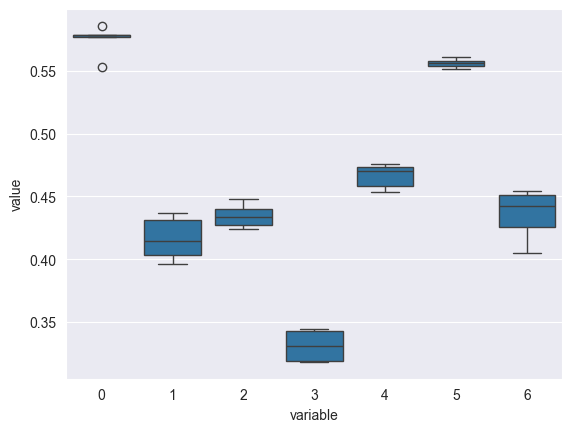

In [24]:
sns.boxplot(x="variable", y="value", data=metrics_f[[0, 1, 2, 3, 4, 5, 6]].melt())

In [18]:
#save the dataframes
metrics_f.to_csv("/Users/vitor/Desktop/mestrado/ingred/data/results/florida_new/hmrm/florida_new-metrics_f.csv")
metrics_p.to_csv("/Users/vitor/Desktop/mestrado/ingred/data/results/florida_new/hmrm/florida_new-metrics_p.csv")
metrics_r.to_csv("/Users/vitor/Desktop/mestrado/ingred/data/results/florida_new/hmrm/florida_new-metrics_r.csv")

,Category,F1-Score,F1-Variance,F1-Formatter,Precision,Precision-Variance,Precision-Formatter,Recall,Recall-Variance,Recall-Formatter,Support,F1-Deviation,Precision-Deviation,Recall-Deviation
0,Community,0.574657,0.011036,57.47 ± 1.10,0.498215,0.010796,49.82 ± 1.08,0.678853,0.011735,67.89 ± 1.17,1750.0,NaN,NaN,NaN
1,Entertainment,0.416252,0.015808,41.63 ± 1.58,0.316799,0.016120,31.68 ± 1.61,0.607728,0.019016,60.77 ± 1.90,680.0,NaN,NaN,NaN
2,Food,0.434530,0.008509,43.45 ± 0.85,0.652379,0.012963,65.24 ± 1.30,0.325794,0.007318,32.58 ± 0.73,3953.0,NaN,NaN,NaN
3,Nightlife,0.330988,0.011316,33.10 ± 1.13,0.234928,0.010425,23.49 ± 1.04,0.560993,0.019574,56.10 ± 1.96,595.0,NaN,NaN,NaN
4,Outdoors,0.466387,0.008785,46.64 ± 0.88,0.351266,0.010164,35.13 ± 1.02,0.694441,0.013635,69.44 ± 1.36,735.0,NaN,NaN,NaN
5,Shopping,0.556152,0.003226,55.62 ± 0.32,0.698408,0.010324,69.84 ± 1.03,0.462099,0.002893,46.21 ± 0.29,4497.0,NaN,NaN,NaN
6,Travel,0.435654,0.018226,43.57 ± 1.82,0.334011,0.018498,33.40 ± 1.85,0.627045,0.014811,62.70 ± 1.48,803.0,NaN,NaN,NaN
7,macro avg,0.459231,NaN,NaN,0.440858,NaN,NaN,0.565279,NaN,NaN,NaN,0.005122,0.004287,0.00707


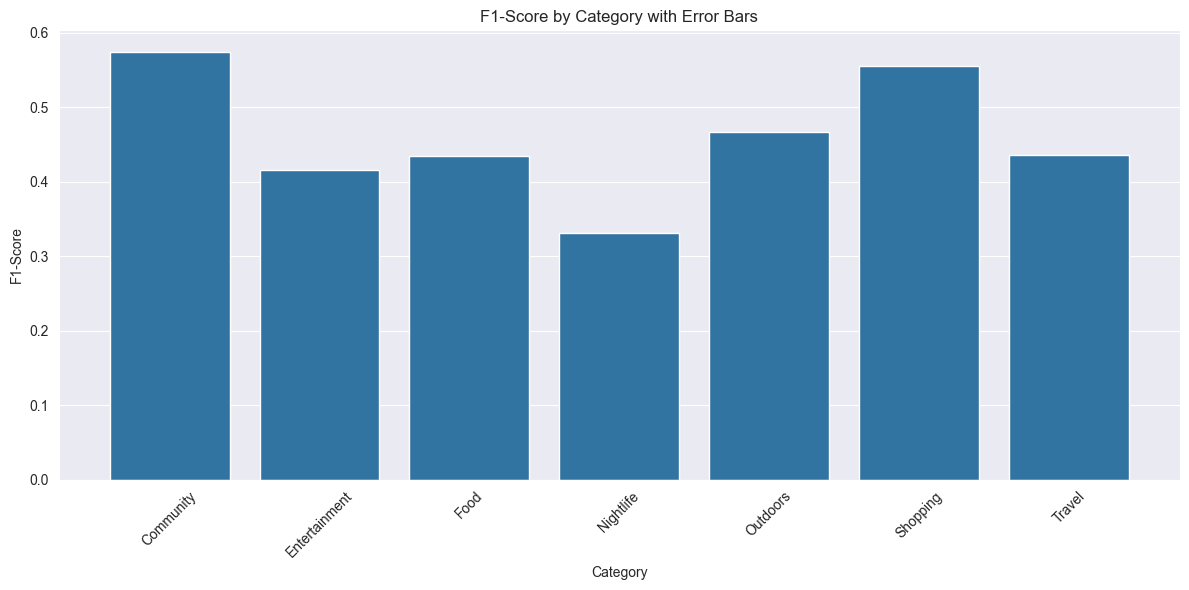

In [26]:
from matplotlib import pyplot as plt

# Calculate mean and variance of metrics for each category
# First create category mapping for readability
category_mapping = {
    0: "Community",
    1: "Entertainment",
    2: "Food",
    3: "Nightlife",
    4: "Outdoors",
    5: "Shopping",
    6: "Travel"
}

# Calculate the mean and variance for each category
summary_data = []

# Get support values (assuming they're the same across folds)
support_values = support if 'support' in locals() else None

# For each category/class
for i, category_id in enumerate(name_columns):
    if isinstance(category_id, int) and category_id in category_mapping:
        category_name = category_mapping[category_id]

        # Calculate means
        avg_f1 = np.mean(metrics_f[category_id])
        avg_precision = np.mean(metrics_p[category_id])
        avg_recall = np.mean(metrics_r[category_id])

        # Calculate variances
        var_f1 = np.std(metrics_f[category_id])
        var_precision = np.std(metrics_p[category_id])
        var_recall = np.std(metrics_r[category_id])

        # Get support if available, otherwise use None
        support_val = support_values[i] if support_values is not None else None

        summary_data.append({
            "Category": category_name,
            "F1-Score": avg_f1,
            "F1-Variance": var_f1,
            "F1-Formatter": f"{100*avg_f1:.2f} ± {100*var_f1:.2f}",
            "Precision": avg_precision,
            "Precision-Variance": var_precision,
            "Precision-Formatter": f"{100*avg_precision:.2f} ± {100*var_precision:.2f}",
            "Recall": avg_recall,
            "Recall-Variance": var_recall,
            "Recall-Formatter": f"{100*avg_recall:.2f} ± {100*var_recall:.2f}",
            "Support": support_val
        })

# Add macro average
summary_data.append({
    "Category": "macro avg",
    "F1-Score": np.mean(metrics_f["macro avg"]),
    "F1-Deviation": np.std(metrics_f["macro avg"]),
    "Precision": np.mean(metrics_p["macro avg"]),
    "Precision-Deviation": np.std(metrics_p["macro avg"]),
    "Recall": np.mean(metrics_r["macro avg"]),
    "Recall-Deviation": np.std(metrics_r["macro avg"]),
    "Support": None
})

# Create the summary dataframe
summary_df = pd.DataFrame(summary_data)

# Display the summary table
display(summary_df)

# Save the summary metrics
summary_df.to_csv("/Users/vitor/Desktop/mestrado/ingred/results/florida_test/svm/summary_category_metrics_with_variance.csv", index=False)

# Create a visualization of the F1 scores with error bars showing variance
plt.figure(figsize=(12, 6))
categories = summary_df['Category'][:-1]  # Exclude macro avg
f1_scores = summary_df['F1-Score'][:-1]
f1_vars = summary_df['F1-Deviation'][:-1]
f1_errors = np.sqrt(f1_vars)  # Convert variance to std deviation for error bars

sns.barplot(x=categories, y=f1_scores)
plt.errorbar(x=range(len(categories)), y=f1_scores, yerr=f1_errors, fmt='none', color='black', capsize=5)
plt.title('F1-Score by Category with Error Bars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()